# Togo EDA Notebook

Exploratory Data Analysis and Cleaning for Togo solar dataset

In [5]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 📥 Load Data
df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])
print("Shape:", df.shape)
df.head()

Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03:00,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05:00,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [7]:
# 📋 Summary Stats & Missing Values
df.describe()
missing = df.isna().sum() / len(df) * 100
missing[missing > 0]

Comments    100.0
dtype: float64

In [8]:
# 🚨 Outlier Detection and Cleaning
z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df[z_cols] = df[z_cols].apply(pd.to_numeric, errors="coerce")
z_scores = df[z_cols].apply(zscore)
outliers = (z_scores.abs() > 3).any(axis=1)
print("Outliers found:", outliers.sum())
df_clean = df[~outliers].copy()
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)
print("Cleaned shape:", df_clean.shape)

Outliers found: 9251
Cleaned shape: (516349, 19)


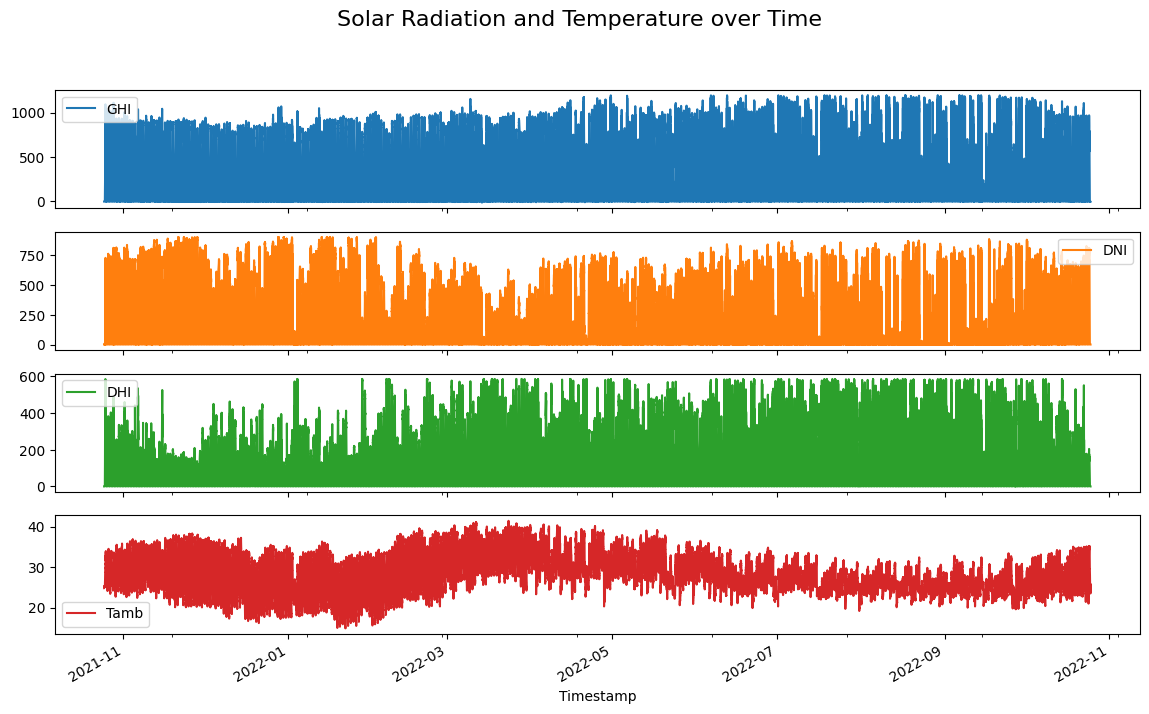

In [9]:
# 📉 Time Series Analysis
df_clean.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(subplots=True, figsize=(14, 8))
plt.suptitle("Solar Radiation and Temperature over Time", fontsize=16)
plt.show()

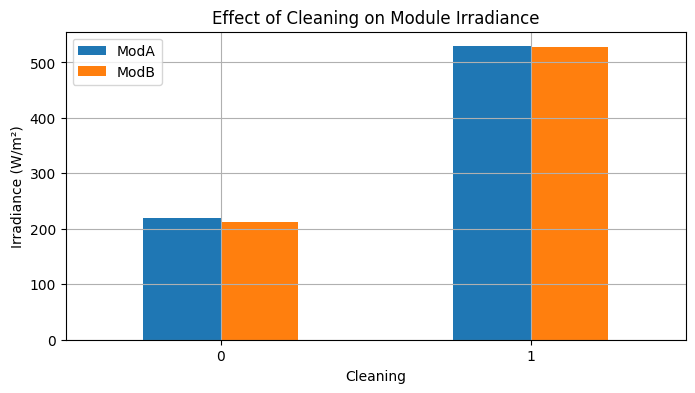

In [10]:
# 🧽 Cleaning Impact
df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar", figsize=(8, 4))
plt.title("Effect of Cleaning on Module Irradiance")
plt.ylabel("Irradiance (W/m²)")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

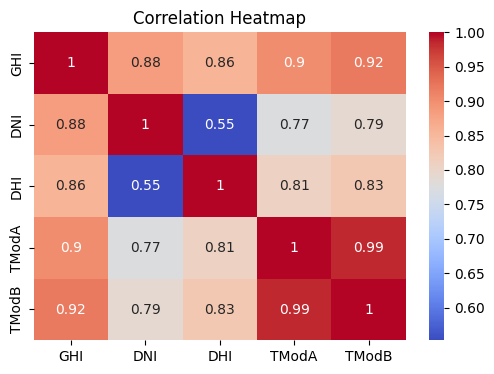

In [11]:
# 🔍 Correlation Heatmap
corr = df_clean[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

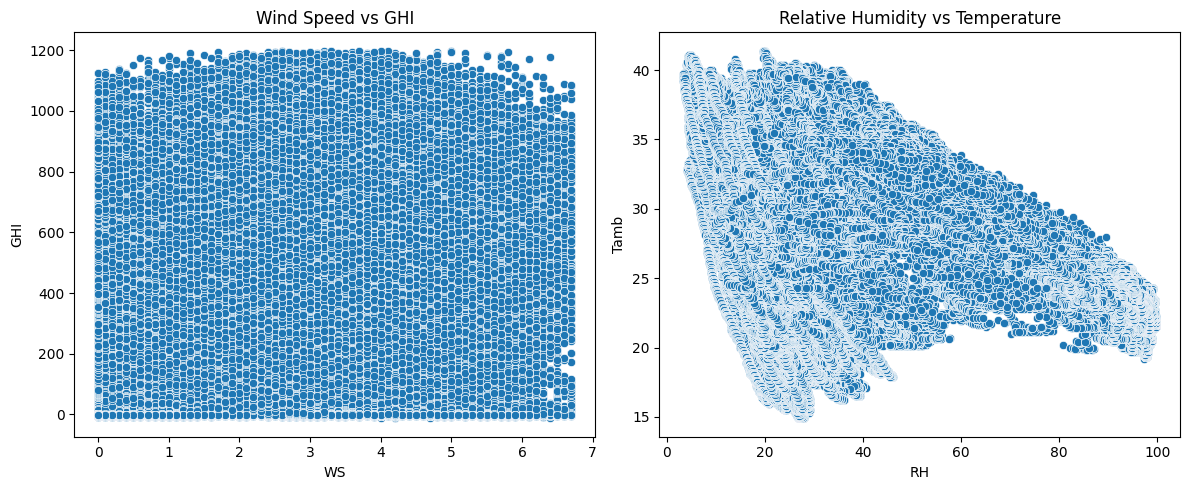

In [12]:
# 📈 Relationship Plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x="WS", y="GHI", data=df_clean, ax=axes[0])
axes[0].set_title("Wind Speed vs GHI")
sns.scatterplot(x="RH", y="Tamb", data=df_clean, ax=axes[1])
axes[1].set_title("Relative Humidity vs Temperature")
plt.tight_layout()
plt.show()

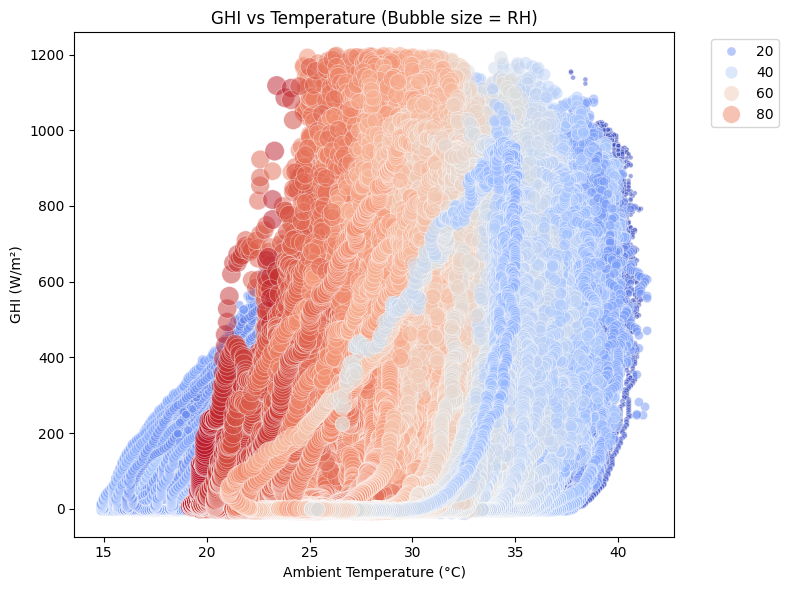

In [13]:
# 🌡️ Bubble Chart
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x="Tamb", y="GHI", size="RH", hue="RH", alpha=0.5, palette="coolwarm", sizes=(10, 200))
plt.title("GHI vs Temperature (Bubble size = RH)")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("GHI (W/m²)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
# 💾 Save Cleaned Dataset
df_clean.to_csv("../data/togo_clean.csv", index=False)
print("Saved cleaned dataset to data/togo_clean.csv")

Saved cleaned dataset to data/togo_clean.csv
